**Imports**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

call dataset

In [2]:
insurance = pd.read_csv('medical_cost.csv')
insurance

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


Preprocessing the dataset

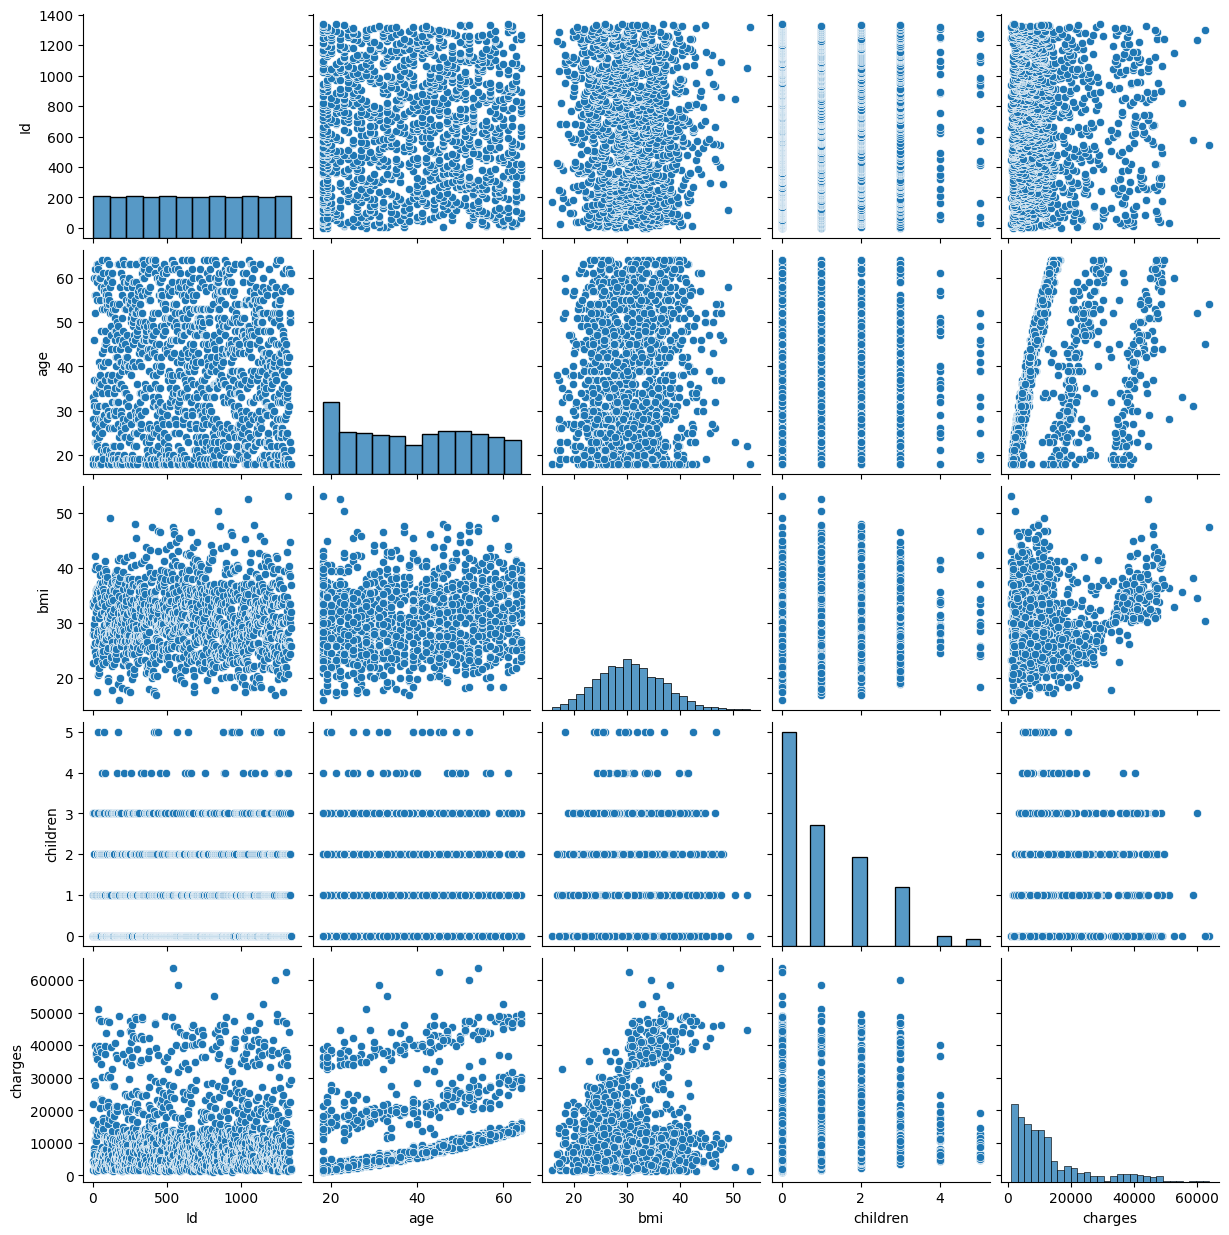

In [3]:
sns.pairplot(insurance)

C:\Users\zeidh\AppData\Local\Temp\ipykernel_7340\2228244087.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=insurance, estimator=np.median, palette='Set2')


<Axes: xlabel='sex', ylabel='charges'>

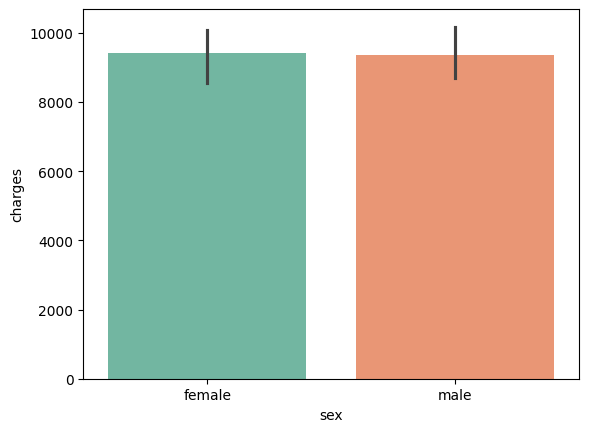

In [4]:
sns.barplot(x='sex',y='charges',data=insurance, estimator=np.median, palette='Set2')

In [5]:
insurance['sex'] = np.where(insurance['sex'] == "male", 1, 0)
insurance['smoker'] = np.where(insurance['smoker'] == "yes", 1, 0)
insurance

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,southwest,16884.92400
1,2,18,1,33.770,1,0,southeast,1725.55230
2,3,28,1,33.000,3,0,southeast,4449.46200
3,4,33,1,22.705,0,0,northwest,21984.47061
4,5,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,1,30.970,3,0,northwest,10600.54830
1334,1335,18,0,31.920,0,0,northeast,2205.98080
1335,1336,18,0,36.850,0,0,southeast,1629.83350
1336,1337,21,0,25.800,0,0,southwest,2007.94500


One-hot-encoding

In [6]:
encoded_insurance = pd.get_dummies(insurance)
encoded_insurance

,Id,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19,0,27.900,0,1,16884.92400,0,0,0,1
1,2,18,1,33.770,1,0,1725.55230,0,0,1,0
2,3,28,1,33.000,3,0,4449.46200,0,0,1,0
3,4,33,1,22.705,0,0,21984.47061,0,1,0,0
4,5,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,1334,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,1335,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,1336,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,1337,21,0,25.800,0,0,2007.94500,0,0,0,1


normalization and standardization

In [7]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region_northwest','region_southeast','region_southwest','region_northeast']),
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    )


dividing into label

In [8]:
X = encoded_insurance.drop(['charges','Id'], axis=1)
y = encoded_insurance['charges']

In [9]:
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [11]:
#fit the column
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 15), (268, 15), (1070,), (268,))

In [12]:
X_train[0]

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.60869565, 0.10734463, 0.4       ])

custom model

In [26]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
                        metrics=["mae"])

history = insurance_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 7ms/step - loss: 13262.3271 - mae: 13262.3271
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 11454.0176 - mae: 11454.0176
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 8110.7456 - mae: 8110.7456
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 7810.6851 - mae: 7810.6851
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 7504.0879 - mae: 7504.0879
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 7112.6401 - mae: 7112.6401
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 6500.1631 - mae: 6500.1631
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 5579.0977 - mae: 5579.0977
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 4512.9194 - mae: 4512.9194
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 3802.4060 - mae: 3802.

In [27]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 1737.1708 - mae: 1737.1708


[1737.1707763671875, 1737.1707763671875]

visualizing the training


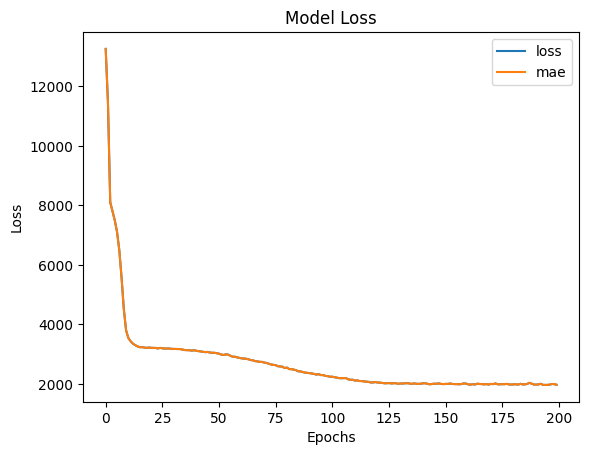

In [28]:
pd.DataFrame(history.history).plot()
plt.title("Model Loss")
plt.xlabel("Epochs")    
plt.ylabel("Loss")
plt.show()

<Axes: ylabel='Frequency'>

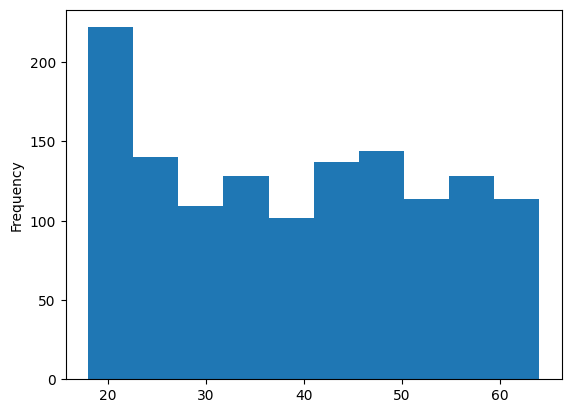

In [29]:
X['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

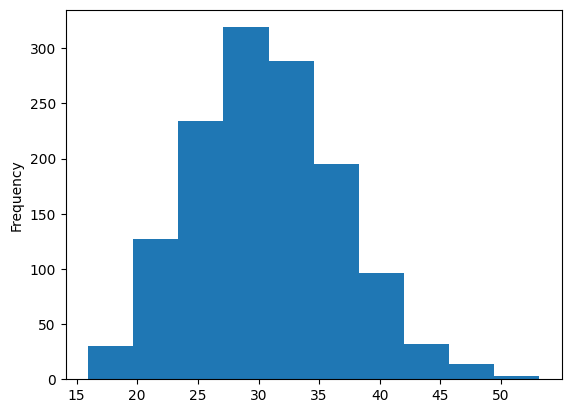

In [30]:
X['bmi'].plot(kind="hist")

In [31]:
y_pred = insurance_model.predict(X_test)
y_pred

9/9 [==============================] - 0s 4ms/step


array([[ 9125.703 ],
       [ 5293.757 ],
       [30344.33  ],
       [ 9303.502 ],
       [26404.445 ],
       [ 4604.1323],
       [ 2101.921 ],
       [14327.775 ],
       [ 3717.1519],
       [10309.901 ],
       [18768.535 ],
       [ 7278.585 ],
       [ 3954.2646],
       [52301.58  ],
       [54399.547 ],
       [46429.887 ],
       [ 9828.403 ],
       [41777.105 ],
       [ 8251.384 ],
       [23621.604 ],
       [ 5110.391 ],
       [ 7429.4785],
       [ 1263.1959],
       [ 2753.8252],
       [11148.016 ],
       [10916.047 ],
       [12712.516 ],
       [ 5142.2837],
       [ 9725.176 ],
       [ 1133.549 ],
       [ 8257.172 ],
       [11967.554 ],
       [ 2024.3774],
       [ 5691.422 ],
       [ 2911.5586],
       [ 7438.3955],
       [ 2604.9844],
       [ 7358.469 ],
       [24064.12  ],
       [36335.945 ],
       [ 4718.623 ],
       [ 2657.0286],
       [11735.011 ],
       [12211.182 ],
       [ 4908.295 ],
       [12319.494 ],
       [ 3614.9792],
       [ 4398

In [32]:
# Create a DataFrame with Id and predicted charges
predictions = pd.DataFrame({
    'Id': range(1, len(y_pred) + 1),
    'charges': y_pred.flatten()
})

# Save the DataFrame to a CSV file
predictions.to_csv('test_predictions.csv', index=False)